In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

In [2]:
#Reading data
df = pd.read_csv("monatszahlen2209_verkehrsunfaelle.csv")

In [3]:
df.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN


- Filtering dataframe for important columns

In [4]:
df= df[["MONATSZAHL","AUSPRÄGUNG","JAHR","MONAT","WERT"]]

In [5]:
df.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN


In [6]:
df.shape

(2086, 5)

- The data set contains 2086 records and 5 features

#### Filter data upto 2020

In [7]:
df_2020= df[df["JAHR"]<=2020]
df_2020=df_2020.reset_index(drop=True)

In [8]:
df_2020.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2020,Summe,430.0
1,Alkoholunfälle,insgesamt,2020,202001,28.0
2,Alkoholunfälle,insgesamt,2020,202002,40.0
3,Alkoholunfälle,insgesamt,2020,202003,27.0
4,Alkoholunfälle,insgesamt,2020,202004,26.0


In [9]:
df_2020.shape

(1911, 5)

- After filtering the data until 2020, the file contains 1911 records

#### Checking for null values

In [10]:
df_2020.isnull().sum()

MONATSZAHL    0
AUSPRÄGUNG    0
JAHR          0
MONAT         0
WERT          0
dtype: int64

- There is no null values

In [11]:
df_2020.JAHR.value_counts()

2020    91
2009    91
2001    91
2002    91
2003    91
2004    91
2005    91
2006    91
2007    91
2008    91
2010    91
2019    91
2011    91
2012    91
2013    91
2014    91
2015    91
2016    91
2017    91
2018    91
2000    91
Name: JAHR, dtype: int64

#### Renaming the columnnames to English

In [15]:
df_2020.rename(columns={"MONATSZAHL":"Category","AUSPRÄGUNG":"Accident-type","JAHR":"Year","MONAT":"Month","WERT":"Value"}, inplace=True)
df_2020.head()

,Category,Accident-type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2020,Summe,430.0
1,Alkoholunfälle,insgesamt,2020,202001,28.0
2,Alkoholunfälle,insgesamt,2020,202002,40.0
3,Alkoholunfälle,insgesamt,2020,202003,27.0
4,Alkoholunfälle,insgesamt,2020,202004,26.0


In [16]:
df_2020.Month.value_counts()

Summe     147
200606      7
200705      7
200706      7
200707      7
         ... 
201305      7
201306      7
201307      7
201308      7
200012      7
Name: Month, Length: 253, dtype: int64

In [17]:
df_= df_2020[df_2020["Month"]=="Summe"]
df_

,Category,Accident-type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2020,Summe,430.0
13,Alkoholunfälle,insgesamt,2019,Summe,434.0
26,Alkoholunfälle,insgesamt,2018,Summe,398.0
39,Alkoholunfälle,insgesamt,2017,Summe,409.0
52,Alkoholunfälle,insgesamt,2016,Summe,301.0
...,...,...,...,...,...
1846,Verkehrsunfälle,Verletzte und Getötete,2004,Summe,6219.0
1859,Verkehrsunfälle,Verletzte und Getötete,2003,Summe,6365.0
1872,Verkehrsunfälle,Verletzte und Getötete,2002,Summe,7026.0
1885,Verkehrsunfälle,Verletzte und Getötete,2001,Summe,7452.0


- Here the month column contains unexpected value "Summe".There is  no meaning so I am dropping 147 records

In [18]:
df_2020.drop(df_2020[df_2020["Month"]=="Summe"].index,inplace=True)
df_2020

,Category,Accident-type,Year,Month,Value
1,Alkoholunfälle,insgesamt,2020,202001,28.0
2,Alkoholunfälle,insgesamt,2020,202002,40.0
3,Alkoholunfälle,insgesamt,2020,202003,27.0
4,Alkoholunfälle,insgesamt,2020,202004,26.0
5,Alkoholunfälle,insgesamt,2020,202005,40.0
...,...,...,...,...,...
1906,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
1907,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
1908,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
1909,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


#### Exrexting the month number

In [19]:
df_2020['Month'] = pd.to_numeric(df_2020['Month'].astype(str).str[-2:], errors='coerce')
df_2020

,Category,Accident-type,Year,Month,Value
1,Alkoholunfälle,insgesamt,2020,1,28.0
2,Alkoholunfälle,insgesamt,2020,2,40.0
3,Alkoholunfälle,insgesamt,2020,3,27.0
4,Alkoholunfälle,insgesamt,2020,4,26.0
5,Alkoholunfälle,insgesamt,2020,5,40.0
...,...,...,...,...,...
1906,Verkehrsunfälle,Verletzte und Getötete,2000,8,647.0
1907,Verkehrsunfälle,Verletzte und Getötete,2000,9,675.0
1908,Verkehrsunfälle,Verletzte und Getötete,2000,10,615.0
1909,Verkehrsunfälle,Verletzte und Getötete,2000,11,578.0


- Converting month to calender name

In [124]:
df_2020['Month'] = df_2020['Month'].apply(lambda x: calendar.month_abbr[x])
df_2020

,Category,Accident-type,Year,Month,Value
1,Alkoholunfälle,insgesamt,2020,Jan,28.0
2,Alkoholunfälle,insgesamt,2020,Feb,40.0
3,Alkoholunfälle,insgesamt,2020,Mar,27.0
4,Alkoholunfälle,insgesamt,2020,Apr,26.0
5,Alkoholunfälle,insgesamt,2020,May,40.0
...,...,...,...,...,...
1906,Verkehrsunfälle,Verletzte und Getötete,2000,Aug,647.0
1907,Verkehrsunfälle,Verletzte und Getötete,2000,Sep,675.0
1908,Verkehrsunfälle,Verletzte und Getötete,2000,Oct,615.0
1909,Verkehrsunfälle,Verletzte und Getötete,2000,Nov,578.0


In [20]:
df_2020.Category.value_counts()

Verkehrsunfälle    756
Alkoholunfälle     504
Fluchtunfälle      504
Name: Category, dtype: int64

- There are mainly 3 types of Catrgories

In [21]:
df_2020["Accident-type"].value_counts()

insgesamt                 756
Verletzte und Getötete    756
mit Personenschäden       252
Name: Accident-type, dtype: int64

- There are mainly 3 types of Accidents

### Data Analysis and Visualization
#### Number of accident per year by Category

In [22]:
(df_2020.groupby([df_2020.Year,df_2020.Category]).Category.count()).unstack()

Category,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
Year,,,
2000,24,24,36
2001,24,24,36
2002,24,24,36
2003,24,24,36
2004,24,24,36
2005,24,24,36
2006,24,24,36
2007,24,24,36
2008,24,24,36


Verkehrsunfälle    756
Alkoholunfälle     504
Fluchtunfälle      504
Name: Category, dtype: int64


<Axes: >

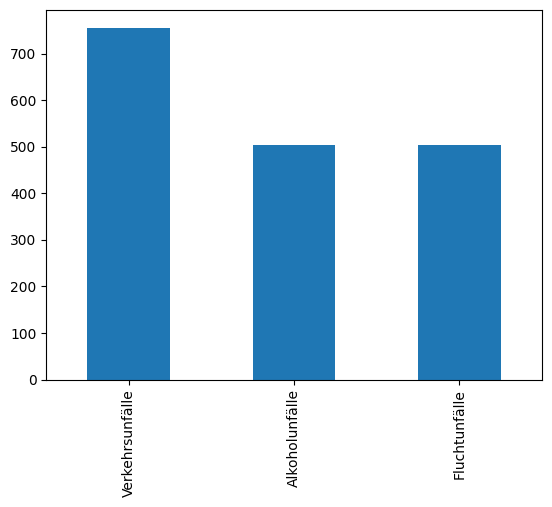

In [133]:
print(df_2020['Category'].value_counts())
df_2020['Category'].value_counts().plot(kind='bar')

- From the above analysis Verkehrsunfälle accidents are high in all years.

#### Number of accident per Month by Category

In [23]:
(df_2020.groupby([df_2020.Month,df_2020.Category]).Category.count()).unstack()

Category,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
Month,,,
1,42,42,63
2,42,42,63
3,42,42,63
4,42,42,63
5,42,42,63
6,42,42,63
7,42,42,63
8,42,42,63
9,42,42,63


<Axes: >

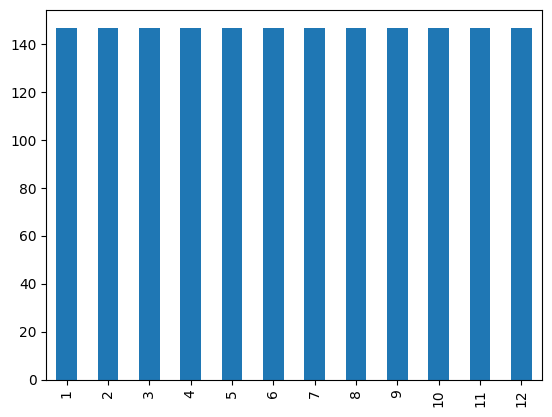

In [25]:
df_2020['Month'].value_counts().plot(kind='bar')

- From the above graph  all the months are sharing equal number of accidents.

In [26]:
(df_2020.groupby([df_2020["Accident-type"],df_2020.Category]).Category.count()).unstack()

Category,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
Accident-type,,,
Verletzte und Getötete,252.0,252.0,252.0
insgesamt,252.0,252.0,252.0
mit Personenschäden,NaN,NaN,252.0


<Axes: >

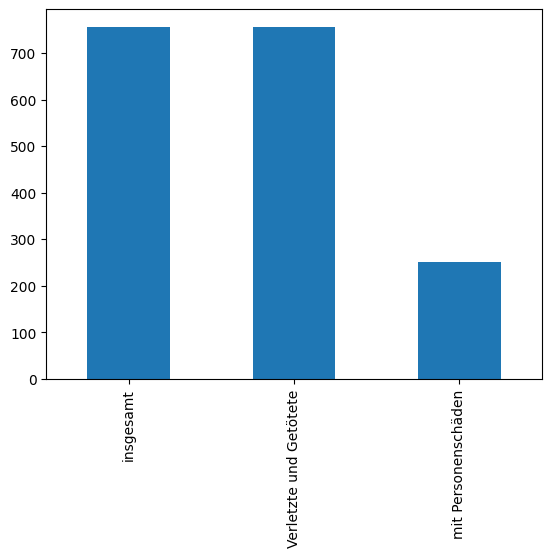

In [27]:
df_2020['Accident-type'].value_counts().plot(kind='bar')

- From the above graph  insgesamt and Verletzte und Getötete  accidents are more than mit Personenschäden	 accidents

#### Auto data visualization using the ‘dabl’ library


Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='Value', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=6.95E-02'}, xlabel='Month (jittered)', ylabel='Value'>,
         <Axes: title={'center': 'F=-5.30E-02'}, xlabel='Year (jittered)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=7.67E-01'}, xlabel='Value', ylabel='Category'>,
         <Axes: title={'center': 'F=4.95E-01'}, xlabel='Value', ylabel='Accident-type'>]],
       dtype=object)]

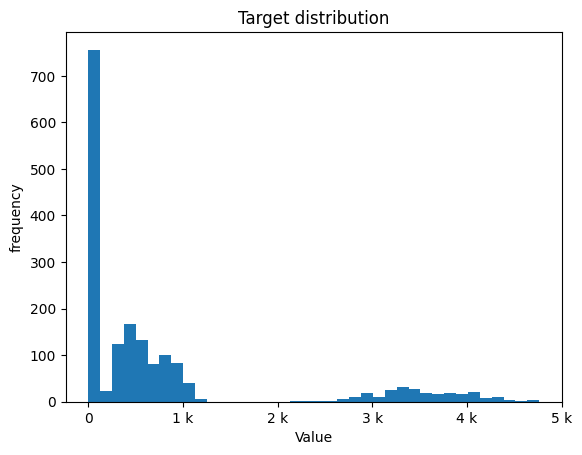

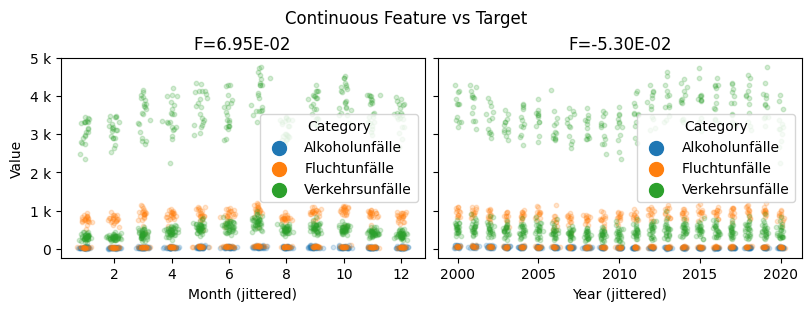

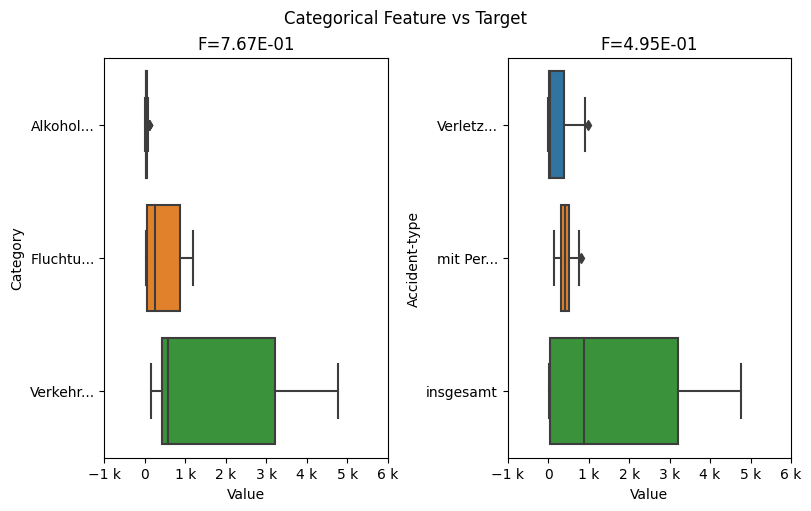

In [28]:
# Visualizing dataset using dabl library
import dabl
dabl.plot(df_2020, target_col='Value')

- Using just one line of code, we can visualize the relationships between input features and a target variable.

#### Association between the ‘Category’ column and target ‘Value’

<function matplotlib.pyplot.show(close=None, block=None)>

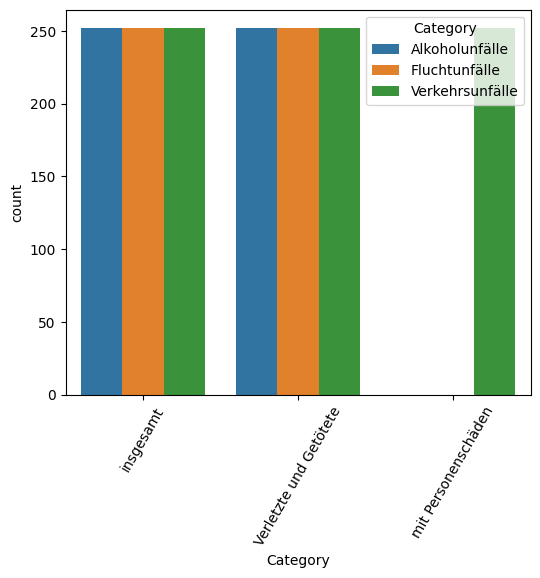

In [36]:
# plot the bar plot of Category and Accident-type
plt.figure(figsize=(6,5))
sns.countplot(x='Accident-type', hue='Category', data=df_2020)
plt.xlabel('Category')
plt.xticks(rotation=60)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

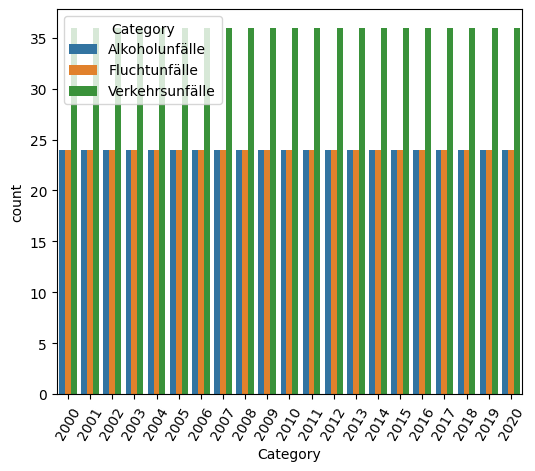

In [37]:
# plot the bar plot of Category and year
plt.figure(figsize=(6,5))
sns.countplot(x='Year', hue='Category', data=df_2020)
plt.xlabel('Category')
plt.xticks(rotation=60)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

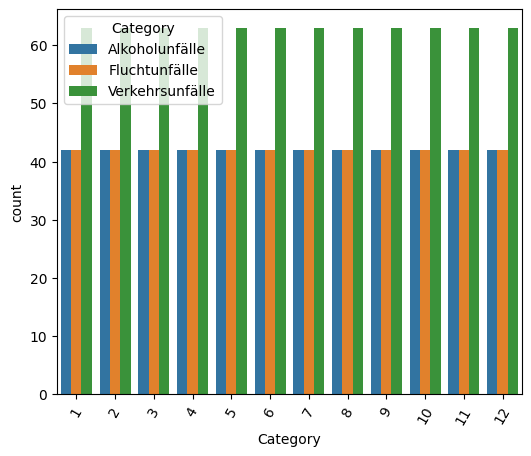

In [38]:
# plot the bar plot of Category and Month
plt.figure(figsize=(6,5))
sns.countplot(x='Month', hue='Category', data=df_2020)
plt.xlabel('Category')
plt.xticks(rotation=60)
plt.show

- From the all above visualization we observining the Verkehrsunfälle Accident category the maximun times happend.